In [3]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
seoul_bike_sharing_demand = fetch_ucirepo(id=560)

# data (as pandas dataframes)
X = seoul_bike_sharing_demand.data.features
y = seoul_bike_sharing_demand.data.targets

# metadata
print(seoul_bike_sharing_demand.metadata)

# variable information
print(seoul_bike_sharing_demand.variables)

{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine features (X) and target (y) into a single DataFrame
df = pd.concat([X, y], axis=1)

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Create a 'datetime' column by combining 'Date' and 'Hour'
df['datetime'] = df.apply(lambda row: row['Date'] + pd.Timedelta(hours=row['Hour']), axis=1)

# Display the first few rows of the combined DataFrame
print("Combined DataFrame head:")
display(df.head())


Combined DataFrame head:


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,datetime
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 00:00:00
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 01:00:00
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 02:00:00
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 03:00:00
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017-12-01 04:00:00


### 1. Daily Bike Demand over Time

This plot shows how the total rented bike count changes over time, helping to identify overall trends or significant events.

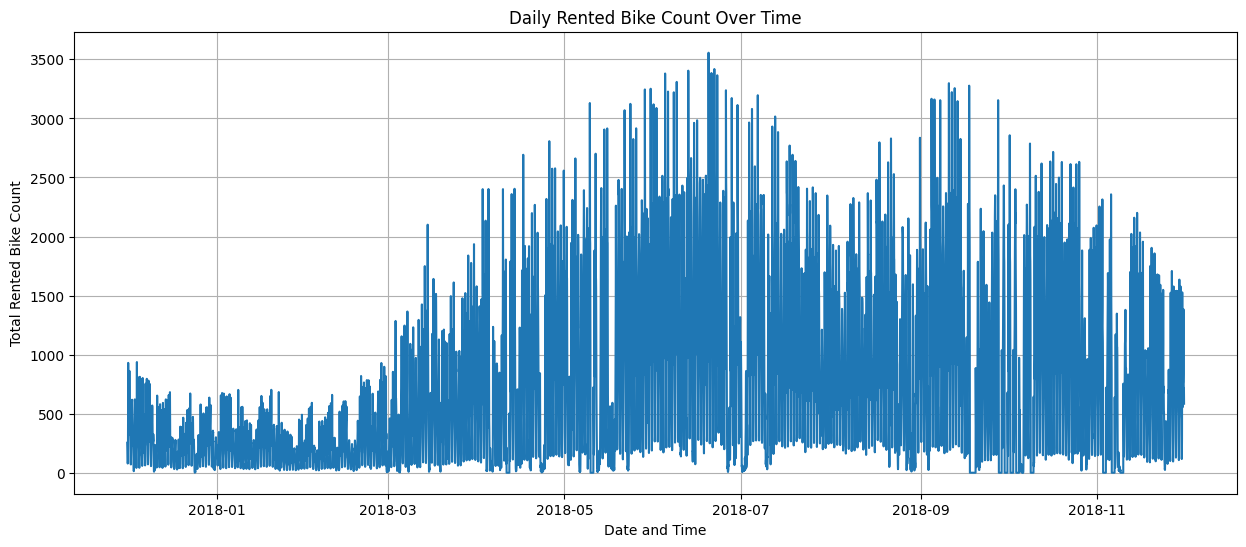

In [5]:
# Group by datetime and sum Rented Bike Count for a smoother time series plot
daily_bike_demand = df.groupby('datetime')['Rented Bike Count'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(x='datetime', y='Rented Bike Count', data=daily_bike_demand)
plt.title('Daily Rented Bike Count Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Total Rented Bike Count')
plt.grid(True)
plt.show()


### 2. Hourly Bike Demand

This plot illustrates the average number of bikes rented per hour, revealing daily patterns and peak rental times.

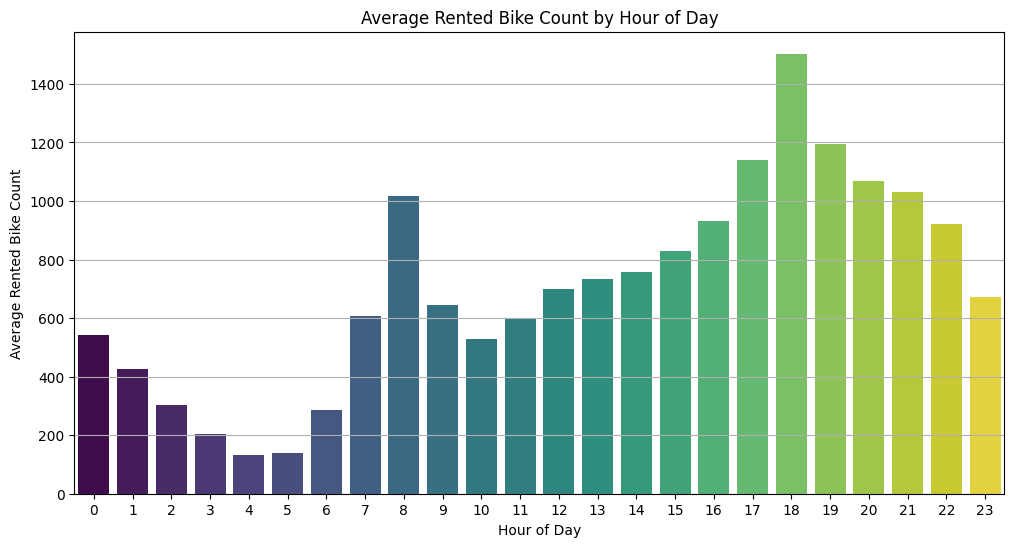

In [9]:
hourly_avg_demand = df.groupby('Hour')['Rented Bike Count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Rented Bike Count', data=hourly_avg_demand, hue='Hour', palette='viridis', legend=False)
plt.title('Average Rented Bike Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rented Bike Count')
plt.xticks(range(0, 24)) # Ensure all hours are displayed
plt.grid(axis='y')
plt.show()

### 3. Bike Demand by Temperature

This scatter plot helps to understand how temperature influences the number of rented bikes.

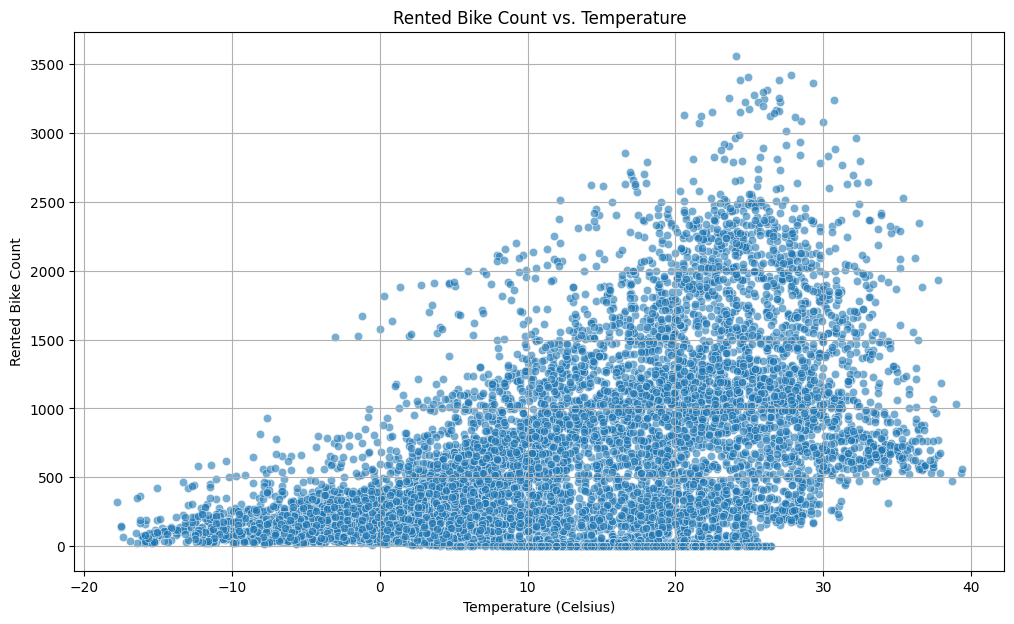

In [7]:
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Temperature', y='Rented Bike Count', data=df, alpha=0.6)
plt.title('Rented Bike Count vs. Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()


### 4. Bike Demand by Seasons

This box plot visualizes the distribution of `Rented Bike Count` for each `Season`, showing seasonal variations in demand.

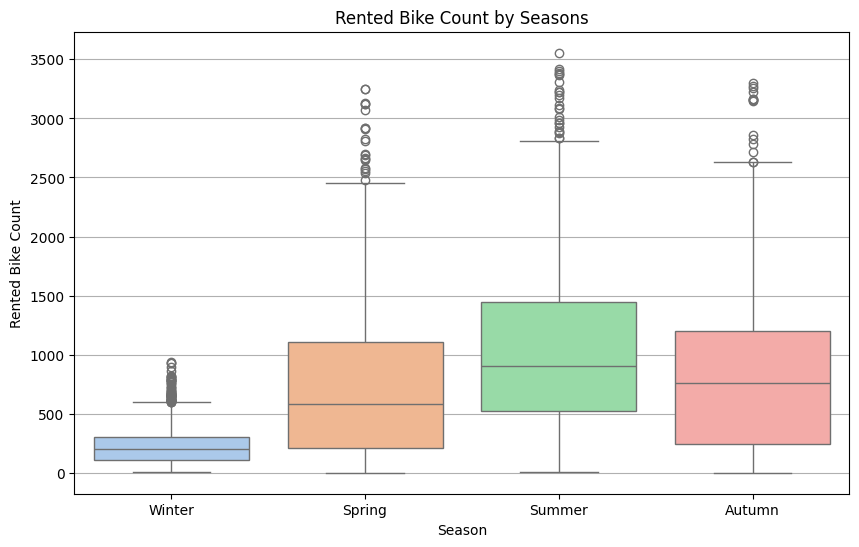

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='Rented Bike Count', data=df, hue='Seasons', palette='pastel', legend=False)
plt.title('Rented Bike Count by Seasons')
plt.xlabel('Season')
plt.ylabel('Rented Bike Count')
plt.grid(axis='y')
plt.show()